## Customer segmentation group-project Dec 2022: Outlier detection

The goal was to find meaningful clusters to optimize marketing out of a dataset with 8500 customers showing 18 features related to their credit card transactions.

### Libraries needed

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pyod.models import cblof
from pyod.models import iforest

In [6]:
df = pd.read_csv('/Users/mjs/Desktop/Dev/Segmentation_Banking_2022/Credit-Card-Segmentation/data/labelled_transactions2.csv')


### EDA

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   8500 non-null   float64
 1   purchases_amount                  8500 non-null   float64
 2   paid_advance                      8500 non-null   float64
 3   full_purchases                    8500 non-null   float64
 4   balance_frequency_update          8500 non-null   float64
 5   installments                      8500 non-null   float64
 6   purchases_frequency               8500 non-null   float64
 7   full_purchases_frequency          8500 non-null   float64
 8   purchases_installments_frequency  8500 non-null   float64
 9   cash_advance_frequency            8500 non-null   float64
 10  nr_cash_advances                  8500 non-null   float64
 11  nr_purchases                      8500 non-null   float64
 12  credit

In [8]:
df_raw = df.drop(columns = ['Outlier_CBLOF', 'Outlier_IF','KMeans_label',
                               'labels_hierarchical_3c','labels_hierarchical_9c','PowTrUMAT',
                              'PCA1','PCA2','PCA3'])

In [9]:
df_raw.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0.0,10.0,1000.0,11.0,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,6.0,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6.0,0.0,1500.0,11.0,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.0,13.0,2000.0,12.0,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3.0,1.0,2500.0,12.0,4094.261427,40.142262,0.000000


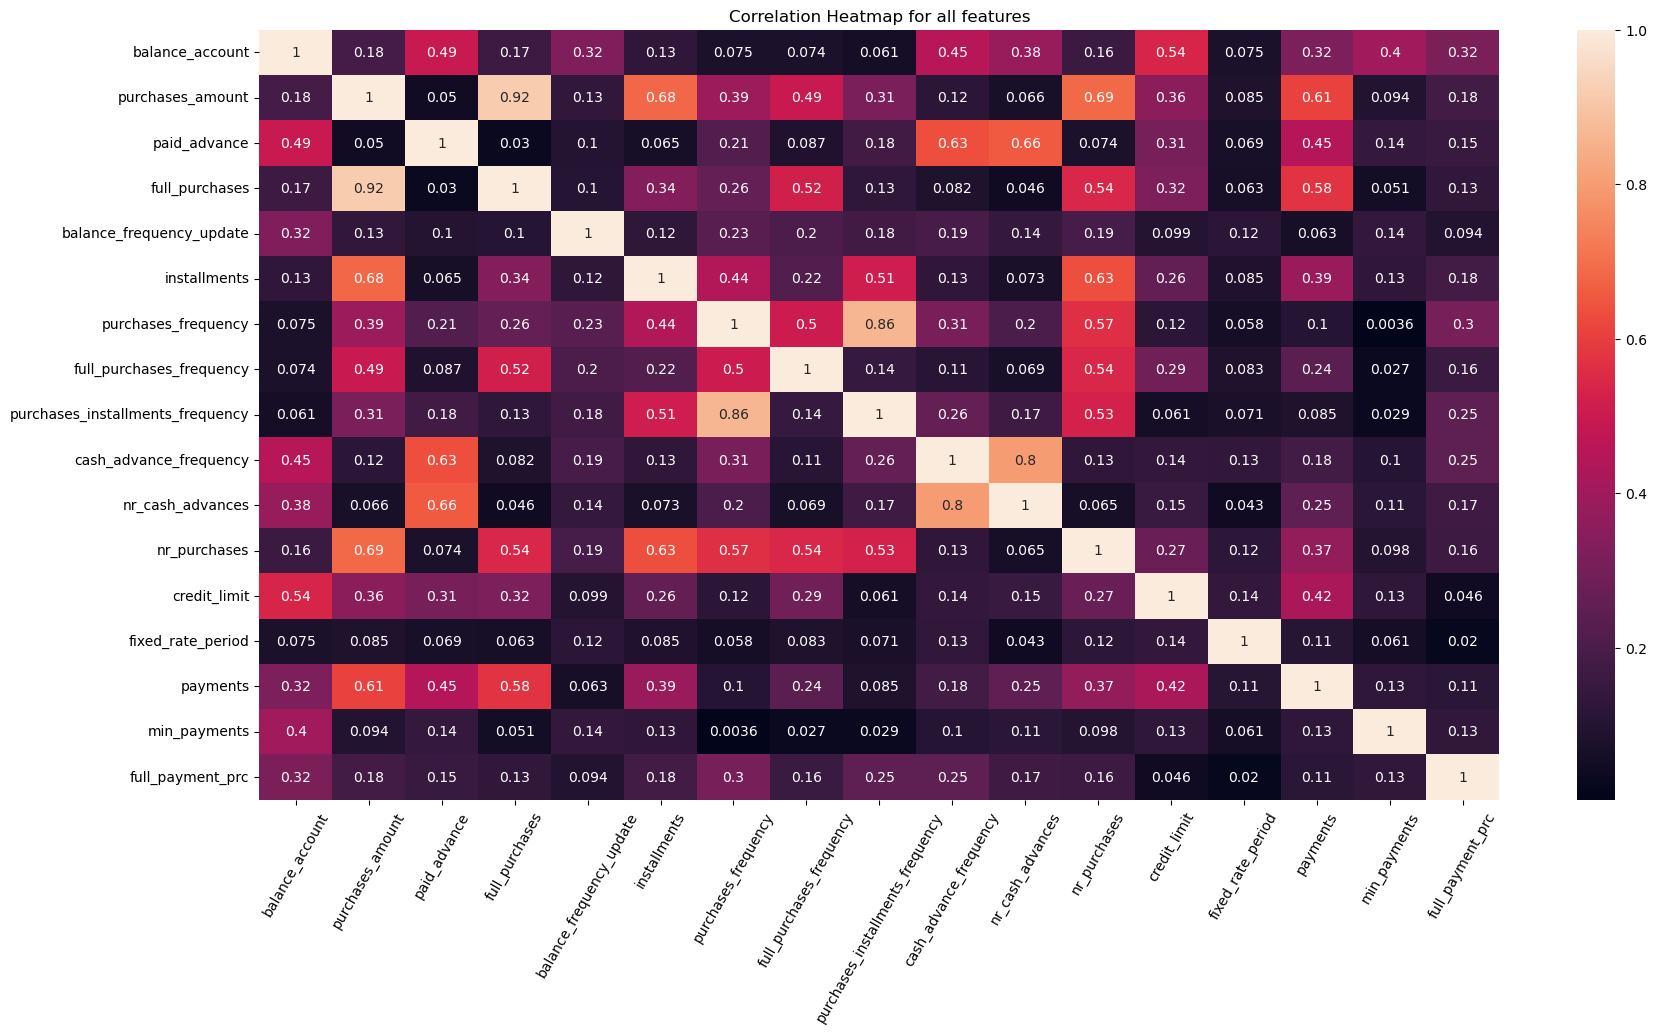

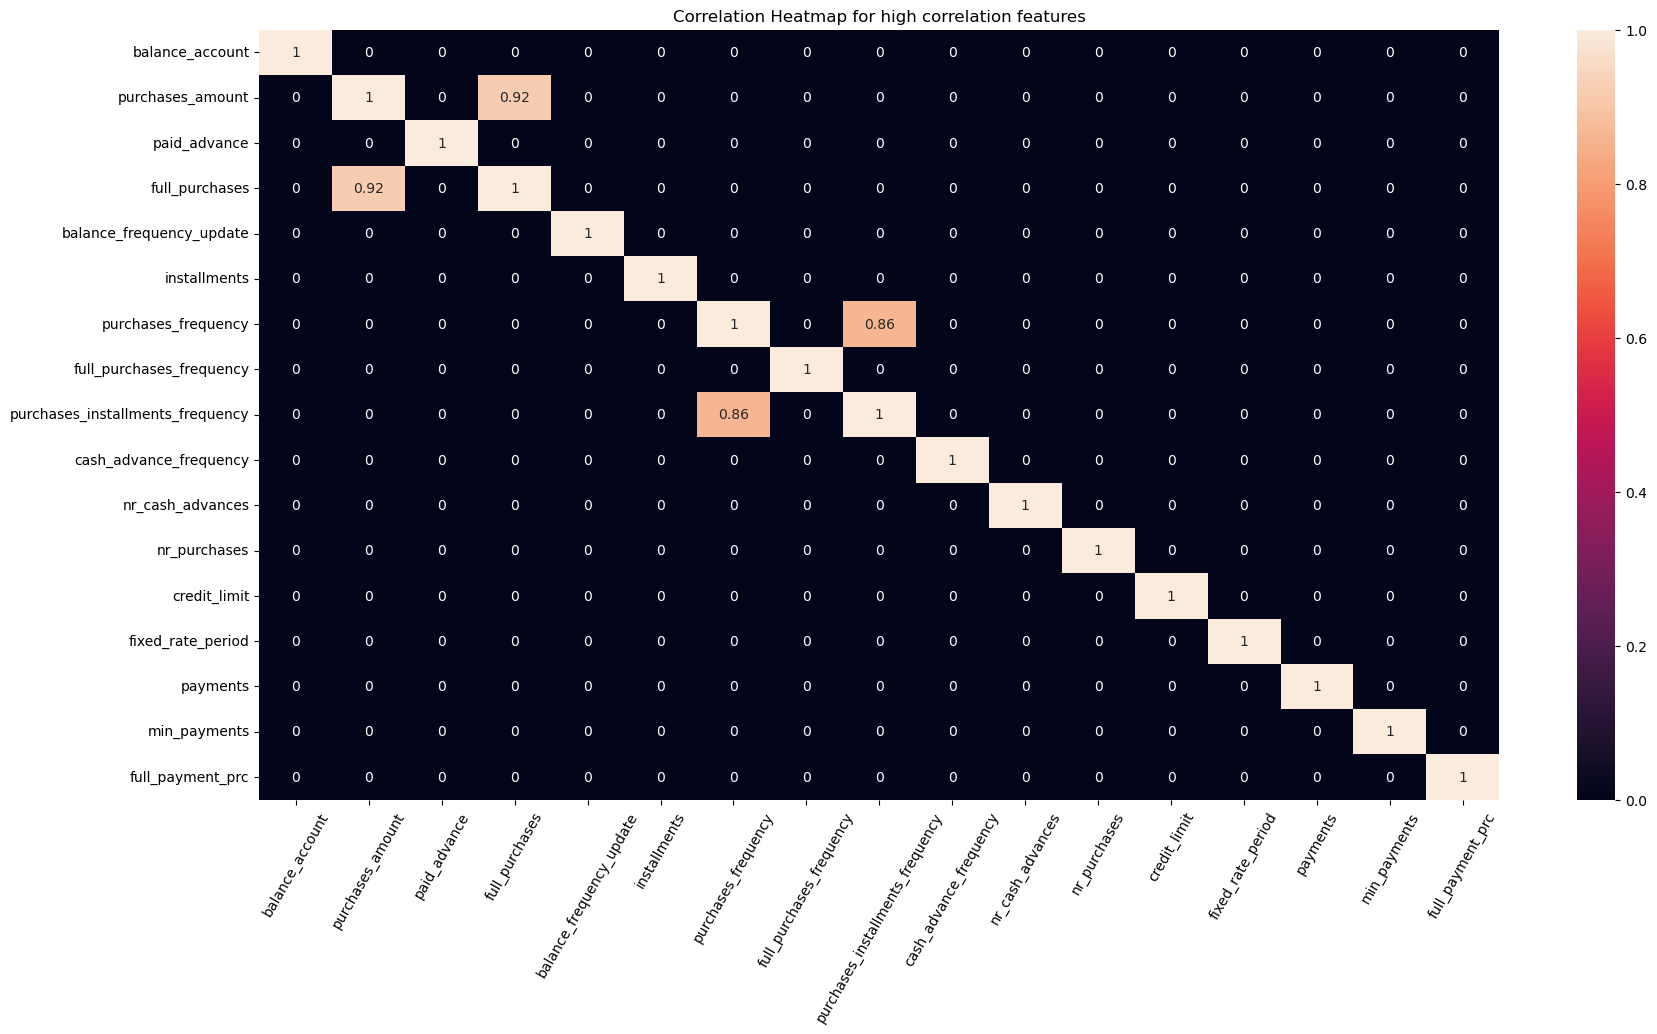

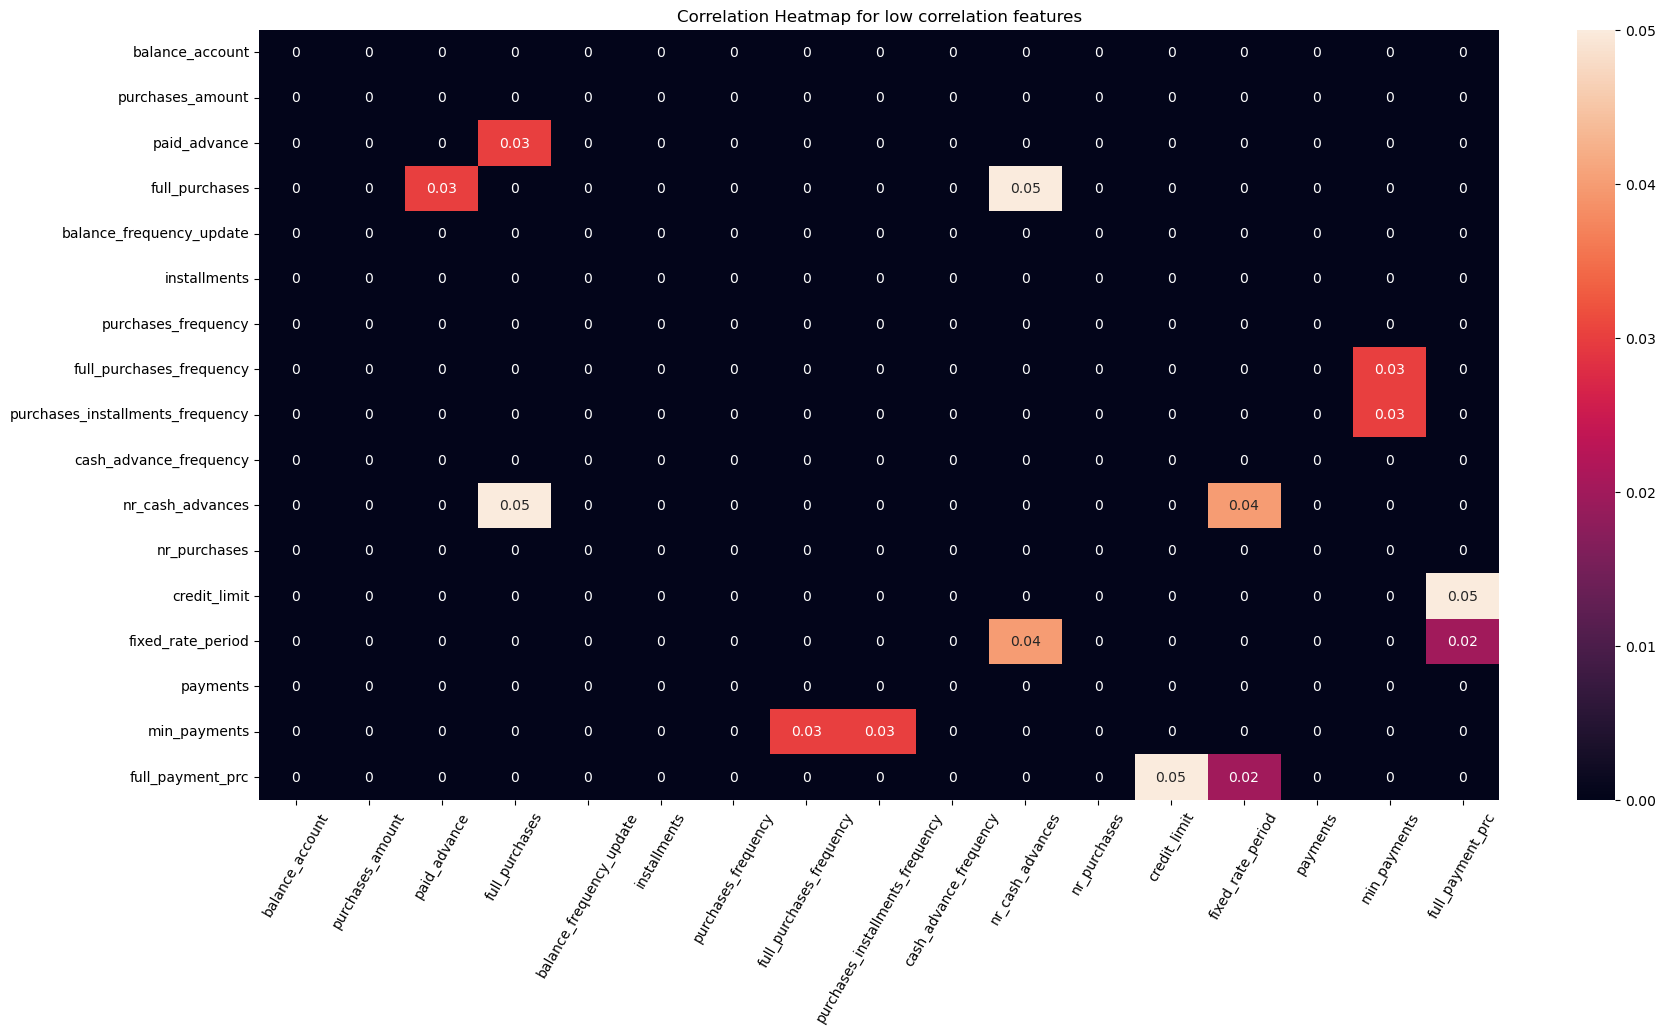

In [29]:
# Create correlation matrixs
corr_matrix = df_raw.corr().abs()
corr_matrix_high = corr_matrix.applymap(lambda x: round(x,2) if x > 0.8 else 0)
corr_matrix_low = corr_matrix.applymap(lambda x: round(x,2) if x < 0.05 else 0)


fig_1 = plt.figure(figsize=(20,10))
fig_1 = sns.heatmap(corr_matrix, annot = True);
fig_1.set_title('Correlation Heatmap for all features');
fig_1.set_xticklabels(corr_matrix.columns, rotation=60, ha='center');
plt.show()
plt.close()


fig_2 = plt.figure(figsize=(20,10))
fig_2 = sns.heatmap(corr_matrix_high, annot = True);
fig_2.set_title('Correlation Heatmap for high correlation features');
fig_2.set_xticklabels(corr_matrix_high.columns, rotation=60, ha='center');
plt.show()
plt.close()


fig_3 = plt.figure(figsize=(20,10))
fig_3 = sns.heatmap(corr_matrix_low, annot = True);
fig_3.set_title('Correlation Heatmap for low correlation features');
fig_3.set_xticklabels(corr_matrix_low.columns, rotation=60, ha='center');
plt.show()
plt.close()


### Filtering the outliers of the dataset with different methods - CBLOF

In [42]:
cblof_model = cblof.CBLOF(contamination=0.01, random_state=42)
cblof_model.fit(df_raw)

/Users/mjs/Conda/anaconda3/envs/outlier_detection/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=None, random_state=42,
   use_weights=False)

In [34]:
# put labels to the outliers, 1 is outlier and 0 is no outlier

outlier_predictions = cblof_model.predict(df_raw)
outliers_df = df_raw.copy(deep=True)
outliers_df['Outlier_cblof'] = outlier_predictions

#Save to a .csv
#outliers_df.to_csv('/Users/mjs/Desktop/Dev/cblof_outliers.csv')

#List of only the outliers
only_outliers_df = outliers_df[outliers_df['Outlier_cblof'] == 1]
print('Total Outliers:', len(only_outliers_df))


Total Outliers: 85


#### Filter outliers with isolation forest

In [ ]:
from pyod.models import iforest

if_model = iforest.IForest(n_estimators=100, contamination=0.1)
if_model.fit(df_raw)
outlier_predictions = if_model.predict(df_raw)


/Users/mjs/Conda/anaconda3/envs/outlier_detection/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])